<a href="https://colab.research.google.com/github/nuwandianusarani/HireGenius/blob/IT21467448-Cv-Shortlisting-and-Initial-Screening/cv_data_Extraction/CV_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2
!pip install spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import PyPDF2
import spacy
import re


In [ ]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# Path to your PDF file
pdf_path = '/content/Buddhika_Chathuranga_SE - V.M.B.C. KARUNARATHNA.pdf'
cv_text = extract_text_from_pdf(pdf_path)
print(cv_text)


I am a student software developer with the ability to adapt to
any technology stack. Good at work under pressure and
excited to learn new technologies. Likes to deliver on time and
agile in any condition. Open-minded and loves to contribute
open-source.
Reach Me
Professional Skills
Buddhika Chathuranga
Education
Work Experience
Publications and Certifications
Projects
13 / 6B, Pubudugama,
Kospalawinna Rd,
Ratnapura.
071 - 176 53 56
vmbckscc456@gmail.com
buddhikac96.github.io
buddhikac96  ( LinkedIn )
buddhikac96  ( GitHub )
buddhikac96  ( Stackoverflow )
runtimeerror  ( Medium )
hackerbuddy96  ( Twitter )
Windows service wrapper Yaml configuration support
XML Schema validation
Tools : C#, DotNet, Visual Studio, GitHub
Internal tools development - Unit testing tool
Code refactoring, API Development, Project Planning - Car
Rental System
Tools : C#, DotNet, Angular, Visual Studio, BitBucket
Conducted knowledge sharing session series
(Asynchronous programming)
Other activities : DS meeting

In [ ]:
nlp = spacy.load('en_core_web_sm')


In [ ]:
import spacy
from collections import Counter

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def extract_soft_skills(text):
    # Define a list of important soft skills for software engineers
    soft_skills = [
        'communication', 'teamwork', 'problem-solving', 'adaptability', 'critical thinking',
        'time management', 'collaboration', 'creativity', 'attention to detail', 'leadership',
        'self-motivation', 'organization', 'empathy', 'conflict resolution', 'negotiation',
        'decision making', 'flexibility', 'accountability', 'active listening', 'resilience'
    ]

    # Convert soft skills to lowercase for consistency
    soft_skills_lower = [skill.lower() for skill in soft_skills]

    # Initialize a counter to track occurrences of each skill
    skill_counts = Counter()

    # Process text with SpaCy
    doc = nlp(text)

    # Define contextual indicators for soft skills
    context_indicators = ["strong", "excellent", "proficient", "skills in", "demonstrated", "ability to", "experienced in"]

    # Iterate over sentences to find soft skills in relevant contexts
    for sent in doc.sents:
        sentence_text = sent.text.lower()
        for skill in soft_skills_lower:
            if skill in sentence_text:
                # Check if any context indicators are present near the skill
                if any(indicator in sentence_text for indicator in context_indicators):
                    skill_counts[skill] += 2  # Higher weighting for contextual relevance
                else:
                    skill_counts[skill] += 1  # Regular weighting

    # Find the top soft skills based on frequency and contextual weighting
    most_relevant_skills = skill_counts.most_common(5)  # Top 5 skills, for example

    return [(skill.title(), count) for skill, count in most_relevant_skills]

# Example usage
text = """
I am known for my strong communication and teamwork skills, which have helped me lead and collaborate effectively on software projects.
My problem-solving and adaptability have been key to handling complex software development tasks, and my critical thinking has driven project success.
"""
soft_skills = extract_soft_skills(cv_text)

print("Most Relevant Soft Skills:")
for skill, count in soft_skills:
    print(f"- {skill} (Contextual Weight: {count})")


Most Relevant Soft Skills:
- Leadership (Contextual Weight: 1)


In [ ]:
import spacy
from collections import Counter
from transformers import pipeline

# Load spaCy and transformers
nlp = spacy.load("en_core_web_sm")
# Pre-trained transformer model for zero-shot classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define a function to extract soft skills based on contextual analysis
def extract_soft_skills(cv_text):
    # Define a list of common soft skills in software engineering
    soft_skills_list = [
        'communication', 'teamwork', 'leadership', 'problem-solving', 'adaptability',
        'time management', 'critical thinking', 'collaboration', 'creativity', 'decision-making',
        'empathy', 'negotiation', 'conflict resolution', 'responsibility', 'accountability'
    ]

    # Deep dive into project and experience sections for analysis
    soft_skills_found = []

    # Identify sentences that might convey soft skills using spaCy
    doc = nlp(cv_text)
    for sent in doc.sents:
        sentence_text = sent.text.strip()

        # Classify each sentence based on the likelihood of conveying soft skills
        results = classifier(sentence_text, candidate_labels=soft_skills_list, multi_label=True)

        # Get skills with a score over a threshold (e.g., 0.6) for accuracy
        for label, score in zip(results["labels"], results["scores"]):
            if score >= 0.6 and label not in soft_skills_found:
                soft_skills_found.append(label)

    # Count occurrences to determine the most emphasized skills
    soft_skills_counts = Counter(soft_skills_found)
    most_important_skills = soft_skills_counts.most_common()

    return most_important_skills


soft_skills = extract_soft_skills(cv_text)

print("Extracted Soft Skills:")
for skill, count in soft_skills:
    print(f"- {skill} (mentioned {count} times)")


Extracted Soft Skills:
- collaboration (mentioned 1 times)
- leadership (mentioned 1 times)
- teamwork (mentioned 1 times)
- communication (mentioned 1 times)
- adaptability (mentioned 1 times)
- responsibility (mentioned 1 times)
- time management (mentioned 1 times)
- problem-solving (mentioned 1 times)
- decision-making (mentioned 1 times)
- critical thinking (mentioned 1 times)


In [ ]:
import spacy
from transformers import pipeline

# Load spaCy model for preliminary processing
nlp = spacy.load("en_core_web_sm")

# Load a transformer-based zero-shot classifier for deeper context-checking
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the function to extract achievements
def extract_achievements(cv_text):
    # Keywords to locate potential achievements
    achievement_keywords = ['award', 'honor', 'achievement', 'recognition', 'accomplishment',
                            'milestone', 'certification', 'promotion', 'patent', 'publication']

    # Candidate label for zero-shot classification (achievement-related)
    candidate_labels = ["achievement", "award", "recognition", "milestone", "promotion"]

    # List to store identified achievements
    achievements = []

    # Pre-process text with spaCy to split it into sentences
    doc = nlp(cv_text)

    for sent in doc.sents:
        sentence_text = sent.text.strip()

        # Step 1: Check for achievement keywords
        if any(keyword in sentence_text.lower() for keyword in achievement_keywords):

            # Step 2: Use transformer classifier to confirm achievement relevance
            results = classifier(sentence_text, candidate_labels=candidate_labels, multi_label=True)

            # Add sentences classified as highly relevant achievements (score > 0.7)
            for label, score in zip(results["labels"], results["scores"]):
                if label == "achievement" and score > 0.7:
                    achievements.append(sentence_text)
                    break  # Break after confirming relevance to avoid duplication

    return achievements

achievements = extract_achievements(cv_text)

print("Extracted Achievements:")
for achievement in achievements:
    print(f"- {achievement}")


Extracted Achievements:


In [ ]:
import re
import spacy

# Load spaCy model for optional context-checking (optional)
nlp = spacy.load("en_core_web_sm")

def extract_programming_languages(text):
    # Define a list of popular programming languages
    programming_languages = [
        'Python', 'Java', 'C', 'C\\+\\+', 'C#', 'JavaScript', 'Ruby', 'Go', 'Swift', 'Kotlin', 'PHP',
        'TypeScript', 'R', 'Perl', 'Objective-C', 'Rust', 'Scala', 'Dart', 'Haskell', 'MATLAB',
        'Shell', 'PowerShell', 'SQL', 'Bash', 'HTML', 'CSS', 'SASS', 'Fortran', 'COBOL'
    ]

    # Initialize an empty list to store found programming languages
    found_languages = []

    # Escape special characters in language names for regex matching
    programming_languages_escaped = [re.escape(lang) for lang in programming_languages]

    # Compile a regex pattern to match programming languages case-insensitively and as whole words
    pattern = re.compile(r'\b(' + '|'.join(programming_languages_escaped) + r')\b', re.IGNORECASE)

    # Find all matches in the text and add unique matches to found_languages
    matches = pattern.findall(text)
    found_languages.extend(set(matches))  # Convert matches to a set to avoid duplicates

    # Optional: Use spaCy to ensure that languages appear in technical contexts
    doc = nlp(text)
    for sent in doc.sents:
        sentence_text = sent.text.lower()
        # Verify technical context if needed
        for lang in programming_languages:
            if lang.lower() in sentence_text and lang not in found_languages:
                found_languages.append(lang)

    return found_languages

# Example usage
text = """
I have worked with various programming languages including Python, Java, and JavaScript for software development.
Additionally, I have experience with web technologies like HTML, CSS, and SQL for database management.
"""
programming_languages = extract_programming_languages(cv_text)

# Display programming languages and their count
print("Programming Languages Found:")
for language in programming_languages:
    print(f"- {language}")

print(f"Total number of programming languages found: {len(programming_languages)}")


Programming Languages Found:
- SQL
- Python
- JavaScript
- TypeScript
- C
- Java
- R
- Go
- C#
Total number of programming languages found: 9


In [ ]:
import re

# Function to extract sections from CV text
def extract_cv_sections(cv_text):
    # Define common section headers for CVs
    section_headers = {
        'Projects': ['projects', 'project experience', 'relevant projects'],
        'Education': ['education', 'academic qualifications', 'academic background'],
        'Work Experience': ['work experience','WORK EXPERIENCE' 'professional experience', 'employment history', 'career history'],
        'Skills': ['skills', 'technical skills', 'professional skills'],
        'Certifications': ['certifications', 'certificates', 'licenses'],
        'Achievements': ['achievements', 'awards', 'honors', 'accomplishments'],
        'References': ['references', 'referees']
    }

    # Create a dictionary to store each section's content
    sections = {header: "" for header in section_headers}

    # Convert the text to lowercase and split by lines
    lines = cv_text.split('\n')
    current_section = None

    # Iterate through each line
    for line in lines:
        line_lower = line.strip().lower()

        # Check if the line is a section header
        found_section = False
        for section, keywords in section_headers.items():
            if any(keyword in line_lower for keyword in keywords):
                current_section = section
                found_section = True
                break

        # If a new section header is found, skip to the next line
        if found_section:
            continue

        # Append the line to the current section if it’s not empty
        if current_section:
            sections[current_section] += line.strip() + " "

    # Clean up whitespace in section contents
    sections = {section: content.strip() for section, content in sections.items() if content.strip()}

    return sections



# Extract sections from the CV
cv_sections = extract_cv_sections(cv_text)

# Display the extracted sections
for section, content in cv_sections.items():
    print(f"{section}:\n{content}\n")



Projects:
13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation Tools : C#, DotNet, Visual Studio, GitHub Internal tools development - Unit testing tool Code refactoring, API Development, Project Planning - Car Rental System Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Programming Languages Java, C#, Python, JavaScript, Elixir Frameworks Antlr4, DotNet, Angular DataBase MySQL, SQL, MongoDB Version Controlling Git, GitHub, BitBucket, GitHub Desktop, GitKraken loki Source code localizer for programming languages Project : https://github.com/odinsvault/loki Technologies: Java, YAMLloki is a to

In [ ]:
import re

# Function to extract a specific technology from CV text
def extract_specific_technology(cv_text, technology):
    # Create a case-insensitive regex pattern for the specified technology
    technology_pattern = re.compile(r'\b' + re.escape(technology) + r'\b', re.IGNORECASE)

    # Search for the technology in the CV text
    matches = technology_pattern.findall(cv_text)

    # Check if technology is found
    if matches:
        print(f"The technology '{technology}' is mentioned {len(matches)} times in the CV.")
    else:
        print(f"The technology '{technology}' is not mentioned in the CV.")

# Example usage:


# Prompt user to input the technology they want to search for
technology = input("Enter the technology you want to search for: ")
extract_specific_technology(cv_text, technology)


Enter the technology you want to search for: java
The technology 'java' is mentioned 7 times in the CV.


In [ ]:
import re
from collections import Counter

# Define a list of common technical skills
technical_skills = [
    'Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'TypeScript', 'PHP', 'Ruby', 'Go', 'Swift', 'Kotlin', 'Rust',
    'React', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Laravel', 'Vue.js', 'Bootstrap', 'TensorFlow',
    'Keras', 'PyTorch', 'jQuery', 'Express', 'Next.js', 'Spring Boot', 'Material UI', 'Hibernate', 'FastAPI',
    'MySQL', 'MongoDB', 'PostgreSQL', 'SQLite', 'Oracle', 'SQL Server', 'Firebase', 'DynamoDB', 'Redis',
    'AWS', 'Azure', 'Google Cloud', 'Firebase', 'Heroku', 'DigitalOcean', 'Cloudflare', 'IBM Cloud',
    'Docker', 'Kubernetes', 'Git', 'GitHub', 'GitLab', 'JIRA', 'Bitbucket', 'Jenkins', 'Ansible', 'Terraform',
    'CI/CD', 'Serverless', 'Kibana', 'Elasticsearch', 'Logstash', 'Splunk', 'Figma', 'Postman'
]

# Function to extract and count technical skills
def extract_and_count_technical_skills(cv_text):
    # Convert the skills list to a dictionary for counting occurrences
    skill_counts = Counter()

    # Iterate through each skill and count occurrences in CV text
    for skill in technical_skills:
        # Create a case-insensitive regex pattern for each skill
        pattern = re.compile(r'\b' + re.escape(skill) + r'\b', re.IGNORECASE)
        matches = pattern.findall(cv_text)
        if matches:
            skill_counts[skill] = len(matches)  # Count the number of matches for each skill

    return skill_counts

# Example CV text (replace with actual CV content)


# Extract and count technical skills
skill_counts = extract_and_count_technical_skills(cv_text)

# Display the skill counts
print("Technical Skills Count:")
for skill, count in skill_counts.items():
    print(f"- {skill}: {count}")


Technical Skills Count:
- Python: 1
- Java: 7
- C: 6
- JavaScript: 1
- TypeScript: 1
- Angular: 3
- MySQL: 1
- MongoDB: 1
- AWS: 1
- Google Cloud: 1
- Git: 1
- GitHub: 12
- Bitbucket: 2
- Jenkins: 2


In [ ]:
import re

# Function to extract all projects from CV text
def extract_projects(cv_text):
    projects = []
    # Define keywords that commonly indicate projects
    project_keywords = ['project', 'technologies used', 'technology stack','description','tools and technologies' 'responsibilities','technical projects', 'company projects', 'university project']

    # Split the text into lines
    lines = cv_text.split('\n')
    current_project = None

    # Iterate through lines to find project sections
    for line in lines:
        line_lower = line.lower()
        # Check if the line contains any project-related keywords
        if any(keyword in line_lower for keyword in project_keywords):
            # If we have a current project being accumulated, save it
            if current_project:
                projects.append(current_project.strip())
            # Start a new project section
            current_project = line.strip()
        elif current_project:
            # Append related details to the current project
            current_project += " " + line.strip()

    # Append the last project, if any
    if current_project:
        projects.append(current_project.strip())

    return projects



# Extract projects from the CV text
extracted_projects = extract_projects(cv_text)

# Display the extracted projects
print("Extracted Projects:")
for project in extracted_projects:
    print(f"- {project}")


Extracted Projects:
- any technology stack. Good at work under pressure and excited to learn new technologies. Likes to deliver on time and agile in any condition. Open-minded and loves to contribute open-source. Reach Me Professional Skills Buddhika Chathuranga Education Work Experience Publications and Certifications
- Projects 13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation Tools : C#, DotNet, Visual Studio, GitHub Internal tools development - Unit testing tool
- Code refactoring, API Development, Project Planning - Car Rental System Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Pro

In [ ]:
import re

def extract_project_section(cv_text):
    # Define start and end markers for the project section
    project_start_keywords = [
        "projects", "project experience", "university projects", "industry projects", "technical projects"
    ]
    section_end_keywords = [
        "education", "work experience", "skills", "certifications", "achievements", "publications", "interests"
    ]

    # Combine the keywords into regex patterns for matching
    project_start_pattern = re.compile(r'(' + '|'.join(project_start_keywords) + r')', re.IGNORECASE)
    section_end_pattern = re.compile(r'(' + '|'.join(section_end_keywords) + r')', re.IGNORECASE)

    # Find where the project section starts
    project_start = project_start_pattern.search(cv_text)
    if not project_start:
        print("No project section found.")
        return None

    # Extract text starting from the project section
    project_text = cv_text[project_start.end():]

    # Find where the next section starts to determine the end of the project section
    section_end = section_end_pattern.search(project_text)
    if section_end:
        project_text = project_text[:section_end.start()]

    return project_text.strip()



# Extract the project section from the CV
project_section = extract_project_section(cv_text)

# Display the extracted project section
if project_section:
    print("Project Section Extracted:")
    print(project_section)


Project Section Extracted:
13 / 6B, Pubudugama,
Kospalawinna Rd,
Ratnapura.
071 - 176 53 56
vmbckscc456@gmail.com
buddhikac96.github.io
buddhikac96  ( LinkedIn )
buddhikac96  ( GitHub )
buddhikac96  ( Stackoverflow )
runtimeerror  ( Medium )
hackerbuddy96  ( Twitter )
Windows service wrapper Yaml configuration support
XML Schema validation
Tools : C#, DotNet, Visual Studio, GitHub
Internal tools development - Unit testing tool
Code refactoring, API Development, Project Planning - Car
Rental System
Tools : C#, DotNet, Angular, Visual Studio, BitBucket
Conducted knowledge sharing session series
(Asynchronous programming)
Other activities : DS meetings, Futsal games, Pool
competition
Programming Languages
Java, C#, Python, JavaScript, Elixir
Frameworks
Antlr4, DotNet, Angular
DataBase
MySQL, SQL, MongoDB
Version Controlling
Git, GitHub, BitBucket, GitHub Desktop, GitKraken
Non-technical


In [ ]:
import re

# Function to extract project experiences from CV text
def extract_project_experiences(cv_text):
    projects = []
    # Define keywords that indicate the start of a project section
    project_keywords = ['project', 'technologies', 'tools', 'description', 'responsibilities']

    # Split the text into lines
    lines = cv_text.split('\n')
    current_project = None

    # Iterate through lines to find project sections
    for line in lines:
        line_lower = line.lower().strip()
        # Check if the line contains any project-related keywords and isn't empty
        if any(keyword in line_lower for keyword in project_keywords) and line:
            # If accumulating a project, save it when a new project starts
            if current_project:
                projects.append(current_project.strip())
            # Start a new project entry
            current_project = line.strip()
        elif current_project:
            # Accumulate the current project details
            current_project += " " + line.strip()

    # Add the last project if any
    if current_project:
        projects.append(current_project.strip())

    # Filter out extra descriptions that do not pertain to specific projects
    filtered_projects = [project for project in projects if len(project.split()) > 5]

    return filtered_projects

# Example CV text (replace with actual CV content)


# Extract project experiences from the CV text
extracted_projects = extract_project_experiences(cv_text)

# Display the extracted projects
print("Extracted Project Experiences:")
for project in extracted_projects:
    print(f"- {project}")


Extracted Project Experiences:
- excited to learn new technologies. Likes to deliver on time and agile in any condition. Open-minded and loves to contribute open-source. Reach Me Professional Skills Buddhika Chathuranga Education Work Experience Publications and Certifications
- Projects 13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation
- Tools : C#, DotNet, Visual Studio, GitHub
- Internal tools development - Unit testing tool
- Code refactoring, API Development, Project Planning - Car Rental System
- Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Programming Languages Java, C#, Python, 

In [ ]:
import re

# Function to extract only the projects from CV text
def extract_only_projects(cv_text):
    projects = []
    # Define keywords that typically indicate the start of a project section
    project_keywords = ['project', 'technologies', 'tools', 'description', 'responsibilities']

    # Split the text into lines
    lines = cv_text.split('\n')
    current_project = None

    # Iterate through lines to find project sections
    for line in lines:
        line_lower = line.lower().strip()
        # Check if the line contains any project-related keywords and isn't empty
        if any(keyword in line_lower for keyword in project_keywords) and line:
            # If accumulating a project, save it when a new project starts
            if current_project:
                projects.append(current_project.strip())
            # Start a new project entry
            current_project = line.strip()
        elif current_project:
            # Accumulate the current project details
            current_project += " " + line.strip()

    # Add the last project if any
    if current_project:
        projects.append(current_project.strip())

    # Filter out extra descriptions that do not pertain to specific projects
    filtered_projects = [project for project in projects if len(project.split()) > 5]

    return filtered_projects



# Extract projects from the CV text
extracted_projects = extract_only_projects(cv_text)

# Display the extracted projects
print("Extracted Projects:")
for project in extracted_projects:
    print(f"- {project}")



Extracted Projects:
- excited to learn new technologies. Likes to deliver on time and agile in any condition. Open-minded and loves to contribute open-source. Reach Me Professional Skills Buddhika Chathuranga Education Work Experience Publications and Certifications
- Projects 13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation
- Tools : C#, DotNet, Visual Studio, GitHub
- Internal tools development - Unit testing tool
- Code refactoring, API Development, Project Planning - Car Rental System
- Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Programming Languages Java, C#, Python, JavaScript,

In [ ]:
def extract_contact_info(text):
    email = re.findall(r'\S+@\S+', text)
    github = re.findall(r'https?://(?:www\.)?github\.com/[^\s]+', text)
    linkedin = re.findall(r'https?://(?:www\.)?linkedin\.com/[^\s]+', text)
    return {
        'email': email[0] if email else None,
        'github': github[0] if github else None,
        'linkedin': linkedin[0] if linkedin else None
    }

contact_info = extract_contact_info(cv_text)
print(contact_info)


{'email': 'vmbckscc456@gmail.com', 'github': 'https://github.com/winsw/winsw', 'linkedin': None}


In [ ]:
import spacy
import re

# Load spaCy's English model for NLP
nlp = spacy.load("en_core_web_sm")

# Define common work experiences for software engineers
work_experience_keywords = [
    'developed', 'implemented', 'designed', 'maintained', 'collaborated', 'debugged', 'tested', 'deployed',
    'reviewed code', 'code review', 'unit testing', 'integration testing', 'QA', 'continuous integration', 'CI/CD',
    'database management', 'optimized database', 'agile development', 'scrum', 'sprints', 'requirements gathering',
    'documented code', 'project documentation', 'customer communication', 'stakeholder engagement', 'mentored',
    'project management', 'team lead'
]

# Function to extract work experiences
def extract_work_experiences(text):
    # Preprocess the text using spaCy to tokenize and process context
    doc = nlp(text.lower())

    # List to hold extracted work experiences
    extracted_experiences = set()

    # Extract sentences from the text that describe work experience
    for sentence in doc.sents:
        sentence_text = sentence.text.strip()

        # Check for direct matches with work experience keywords
        for keyword in work_experience_keywords:
            if re.search(r'\b' + re.escape(keyword) + r'\b', sentence_text):
                extracted_experiences.add(sentence_text)

    return list(extracted_experiences)

# Example resume text (Replace with actual resume text)
resume_text = """
Developed and maintained web applications using Python and Django.
Collaborated with cross-functional teams in Agile sprints to implement new features.
Conducted code reviews to ensure high-quality and maintainable code.
Managed CI/CD pipelines and deployment processes using Jenkins.
Documented project requirements and created technical documentation for team reference.
"""

# Extract work experiences from the resume
extracted_experiences = extract_work_experiences(cv_text)
print("Extracted Work Experiences:")
for experience in extracted_experiences:
    print(f"- {experience}")




Extracted Work Experiences:
- i updated winsw to be configured by the yaml configuration file
under gsoc2020.
simply - research project ( ongoing )
simple extensible programming language for kids
project : https://github.com/odinsvault
technologies: java, antlr4, springboot, reactsimply is a web-oriented programming language that is being
developed for kids to learn to program easily.
- windows service wrapper yaml configuration support
xml schema validation
tools : c#, dotnet, visual studio, github
internal tools development - unit testing tool
code refactoring, api development, project planning - car
rental system
tools : c#, dotnet, angular, visual studio, bitbucket
conducted knowledge sharing session series
(asynchronous programming)
other activities : ds meetings, futsal games, pool
competition
programming languages
java, c#, python, javascript, elixir
frameworks
antlr4, dotnet, angular
database
mysql, sql, mongodb
version controlling
git, github, bitbucket, github desktop, gitkra

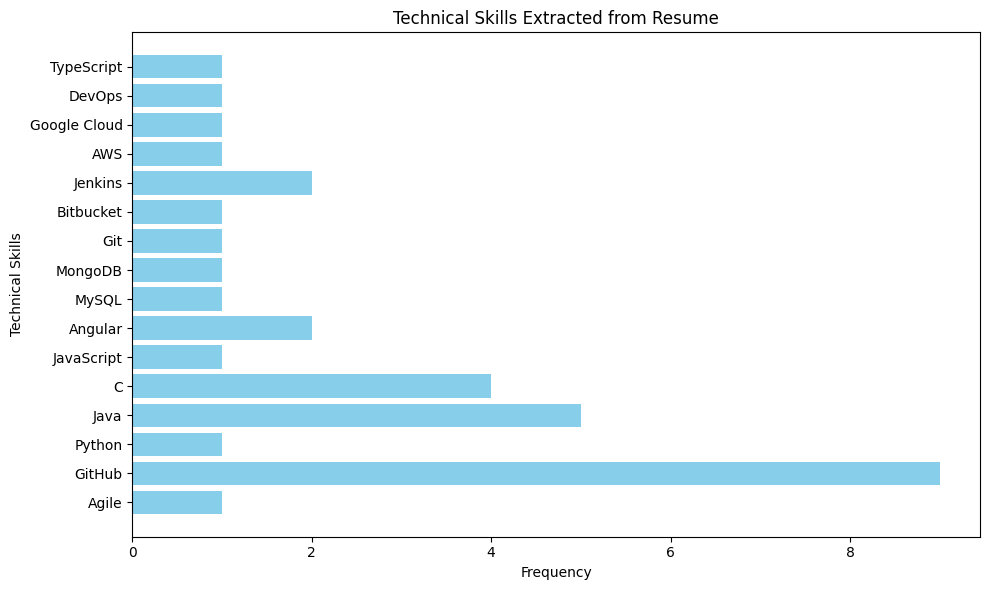

In [ ]:

import matplotlib.pyplot as plt
from collections import Counter



# Define dictionaries for technical skills only
skills_keywords = {
    'Programming Languages': [
        'Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'TypeScript', 'PHP', 'Ruby', 'Go', 'Swift', 'Kotlin', 'Rust'
    ],
    'Frameworks and Libraries': [
        'React', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Laravel', 'Vue.js', 'Bootstrap', 'TensorFlow',
        'Keras', 'PyTorch', 'jQuery', 'Express', 'Next.js', 'Spring Boot', 'Material UI', 'Hibernate', 'FastAPI'
    ],
    'Databases': [
        'MySQL', 'MongoDB', 'PostgreSQL', 'SQLite', 'Oracle', 'SQL Server', 'Firebase', 'DynamoDB', 'Redis'
    ],
    'Cloud Platforms': [
        'AWS', 'Azure', 'Google Cloud', 'Firebase', 'Heroku', 'DigitalOcean', 'Cloudflare', 'IBM Cloud'
    ],
    'Tools and Technologies': [
        'Docker', 'Kubernetes', 'Git', 'GitHub', 'GitLab', 'JIRA', 'Bitbucket', 'Jenkins', 'Ansible', 'Terraform',
        'CI/CD', 'Serverless', 'Kibana', 'Elasticsearch', 'Logstash', 'Splunk', 'Figma', 'Postman'
    ],
    'Development Methodologies': [
        'Agile', 'Scrum', 'Kanban', 'DevOps', 'Waterfall', 'Test-Driven Development', 'Behavior-Driven Development'
    ]
}

# Combine all technical skills into a single list for easier matching
all_technical_skills = [skill for category in skills_keywords.values() for skill in category]

# Function to extract technical skills from project descriptions
def extract_technical_skills_from_projects(text):
    # Preprocess the text using spaCy to tokenize and process context
    doc = nlp(text.lower())

    # List to hold extracted technical skills
    extracted_technical_skills = []

    # Extract sentences from the text that describe projects
    for sentence in doc.sents:
        sentence_text = sentence.text.strip()

        # Check for direct matches with technical skill keywords
        for skill in all_technical_skills:
            if re.search(r'\b' + re.escape(skill.lower()) + r'\b', sentence_text):
                extracted_technical_skills.append(skill)

    return extracted_technical_skills



# Extract technical skills from the projects section of the resume
extracted_technical_skills = extract_technical_skills_from_projects(cv_text)

# Count the frequency of each technical skill
skill_counts = Counter(extracted_technical_skills)

# Plotting the skills in a bar chart
def plot_skills_bar_chart(skill_counts):
    # Extract skill names and their counts
    skills = list(skill_counts.keys())
    counts = list(skill_counts.values())

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(skills, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Technical Skills')
    plt.title('Technical Skills Extracted from Resume')
    plt.tight_layout()

    # Display the chart
    plt.show()

# Plot the bar chart
plot_skills_bar_chart(skill_counts)


In [ ]:
def extract_work_experience(text):
    work_experience = []
    # Split text into sentences
    sentences = text.split('\n')
    for sentence in sentences:
        # Look for common job titles or keywords in sentences
        if any(keyword in sentence for keyword in ['Software Engineer', 'Intern', 'Developed', 'Key role']):
            work_experience.append(sentence.strip())
    return work_experience

work_experience = extract_work_experience(cv_text)
print("Work Experience:", work_experience)


Work Experience: ['Internal tools development - Unit testing tool', 'Software Engineer | Intern']


In [ ]:


# Define dictionaries for technical and soft skills
skills_keywords = {
    'Technical Skills': [
        'Python', 'Java', 'C', 'C++', 'JavaScript', 'TypeScript', 'PHP', 'Ruby', 'Go', 'Swift', 'Kotlin', 'Rust',
        'React', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Laravel', 'Vue.js', 'TensorFlow', 'Keras', 'PyTorch',
        'MySQL', 'MongoDB', 'PostgreSQL', 'SQLite', 'Oracle', 'SQL Server', 'AWS', 'Azure', 'Docker', 'Kubernetes', 'Git',
        'CI/CD', 'JIRA', 'Bitbucket', 'Jenkins', 'Heroku', 'Google Cloud', 'Redis'
    ],
    'Soft Skills': [
        'Leadership', 'Teamwork', 'Communication', 'Collaboration', 'Problem Solving', 'Time Management',
        'Adaptability', 'Creativity', 'Critical Thinking', 'Decision Making', 'Quick Learner'
    ]
}

# Combine all skills into a single list for easier matching
all_skills = [skill for category in skills_keywords.values() for skill in category]

# Function to extract skills from project descriptions
def extract_skills_from_projects(text):
    # Preprocess the text using spaCy to tokenize and process context
    doc = nlp(text.lower())

    # Set to hold unique extracted skills
    extracted_skills = set()

    # Extract sentences from the text that describe projects
    for sentence in doc.sents:
        sentence_text = sentence.text.strip()

        # Check for direct matches with skill keywords
        for skill in all_skills:
            if re.search(r'\b' + re.escape(skill.lower()) + r'\b', sentence_text):
                extracted_skills.add(skill)

        # Infer skills from action words (soft skills and implied technical skills)
        action_words = ['developed', 'built', 'created', 'designed', 'led', 'implemented', 'managed', 'collaborated', 'worked']
        if any(action_word in sentence_text for action_word in action_words):
            for token in sentence:
                # Check for nouns (potential skill indicators) and match with known skills
                if token.pos_ == "NOUN" and token.text.capitalize() in all_skills:
                    extracted_skills.add(token.text.capitalize())

                # Infer soft skills from actions like "led", "collaborated", etc.
                if token.lemma_ in ['lead', 'collaborate', 'communicate', 'manage']:
                    extracted_skills.add('Leadership') if token.lemma_ == 'lead' else extracted_skills.add('Teamwork')

    return sorted(extracted_skills)


# Extract skills from the projects section of the resume
extracted_skills = extract_skills_from_projects(cv_text)
print("Extracted Skills from Projects Section:")
for skill in extracted_skills:
    print(f"- {skill}")



Extracted Skills from Projects Section:
- AWS
- Angular
- Bitbucket
- C
- Git
- Google Cloud
- Java
- JavaScript
- Jenkins
- Leadership
- MongoDB
- MySQL
- Python
- TypeScript


In [ ]:
import spacy
import re

# Load spaCy's English model for NLP
nlp = spacy.load("en_core_web_sm")

# Define dictionaries for technical skills only
skills_keywords = {
    'Programming Languages': [
        'Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'TypeScript', 'PHP', 'Ruby', 'Go', 'Swift', 'Kotlin', 'Rust'
    ],
    'Frameworks and Libraries': [
        'React', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Laravel', 'Vue.js', 'Bootstrap', 'TensorFlow',
        'Keras', 'PyTorch', 'jQuery', 'Express', 'Next.js', 'Spring Boot', 'Material UI', 'Hibernate', 'FastAPI'
    ],
    'Databases': [
        'MySQL', 'MongoDB', 'PostgreSQL', 'SQLite', 'Oracle', 'SQL Server', 'Firebase', 'DynamoDB', 'Redis'
    ],
    'Cloud Platforms': [
        'AWS', 'Azure', 'Google Cloud', 'Firebase', 'Heroku', 'DigitalOcean', 'Cloudflare', 'IBM Cloud'
    ],
    'Tools and Technologies': [
        'Docker', 'Kubernetes', 'Git', 'GitHub', 'GitLab', 'JIRA', 'Bitbucket', 'Jenkins', 'Ansible', 'Terraform',
        'CI/CD', 'Serverless', 'Kibana', 'Elasticsearch', 'Logstash', 'Splunk', 'Figma', 'Postman'
    ],
    'Development Methodologies': [
        'Agile', 'Scrum', 'Kanban', 'DevOps', 'Waterfall', 'Test-Driven Development', 'Behavior-Driven Development'
    ]
}

# Combine all technical skills into a single list for easier matching
all_technical_skills = [skill for category in skills_keywords.values() for skill in category]

# Function to extract technical skills from project descriptions
def extract_technical_skills_from_projects(text):
    # Preprocess the text using spaCy to tokenize and process context
    doc = nlp(text.lower())

    # Set to hold unique extracted technical skills
    extracted_technical_skills = set()

    # Extract sentences from the text that describe projects
    for sentence in doc.sents:
        sentence_text = sentence.text.strip()

        # Check for direct matches with technical skill keywords
        for skill in all_technical_skills:
            if re.search(r'\b' + re.escape(skill.lower()) + r'\b', sentence_text):
                extracted_technical_skills.add(skill)

        # Infer technical skills from action words (technical implementation)
        action_words = ['developed', 'built', 'created', 'designed', 'implemented', 'managed', 'worked']
        if any(action_word in sentence_text for action_word in action_words):
            for token in sentence:
                # Check for nouns (potential skill indicators) and match with known technical skills
                if token.pos_ == "NOUN" and token.text.capitalize() in all_technical_skills:
                    extracted_technical_skills.add(token.text.capitalize())

    return sorted(extracted_technical_skills)


# Extract technical skills from the projects section of the resume
extracted_technical_skills = extract_technical_skills_from_projects(cv_text)
print("Extracted Technical Skills from Projects Section:")
for skill in extracted_technical_skills:
    print(f"- {skill}")


Extracted Technical Skills from Projects Section:
- AWS
- Agile
- Angular
- Bitbucket
- C
- DevOps
- Git
- GitHub
- Google Cloud
- Java
- JavaScript
- Jenkins
- MongoDB
- MySQL
- Python
- TypeScript


Extracted Skills from Projects Section:
- MongoDB
- Python


In [ ]:
def extract_achievements(text):
    achievements = []
    # Split the text into lines
    lines = text.split('\n')

    # Keywords to detect achievements
    achievement_keywords = ['achievement', 'awarded', 'recognized', 'won', 'accomplished', 'Key role', 'Key achievement', 'improved', 'enhanced', 'successfully']

    current_achievement = None

    for line in lines:
        # Check if the line contains any achievement-related keywords
        if any(keyword.lower() in line.lower() for keyword in achievement_keywords):
            if current_achievement:
                achievements.append(current_achievement.strip())
            current_achievement = line.strip()
        elif current_achievement:
            current_achievement += " " + line.strip()

    if current_achievement:
        achievements.append(current_achievement.strip())  # Append the last achievement

    return achievements

# Extract achievements
achievements = extract_achievements(cv_text)
print("Achievements:")
for achievement in achievements:
    print(f"- {achievement}")


Achievements:
- Wondershare Filmora,  Cisco Packet Tracer,Blender,WEKA, Protégé -OWL, NLTK, OpenCV  Related Course Works : NLP, AI, Semantic Web,Data mining, Image Processing, Enterprise Application Development  NON -TECHNICAL SKILLS  Web Development  Blog Writing  Mathematics  Dancing  REFEREES Mr. S.C. Premaratne Department Head /Senior Lecturer Faculty of Information Technology University of Moratuwa . Mobile: +94 714413362 E-mail: samindap@uom.lk  Mr. Sathya Ganepola COO/Software Architect Infosoft Lanka (Pvt.) Ltd Nawam Mawatha, Colombo 02. Mobile: +94 718099045 E-mail: sathya@infosoft.lk  QUICK FOODIE - FOOD ORDERING APP (Individual  Project) | 2020 A simple web application whic h can be used to manage food  in a restaurant. Customers can login to system externally and order food and pay online. Technologies:  ASP.NET Web Forms, MSSQL  WATER QUALITY MEASURING DEVICE | 2019 A microcontroller -based project is used to measure water quality by using pH, turbidity and temperature

In [ ]:
def extract_skills(text):
    skills = []
    # Split the text into lines
    lines = text.split('\n')

    # Define common technical and soft skills keywords
    skill_keywords = [
        'Python', 'Java', 'C#', 'JavaScript', 'React.js', 'Angular', 'SQL', 'MongoDB',
        'Docker', 'Kubernetes', 'HTML', 'CSS', 'Tailwind CSS', 'Azure', 'AWS', 'Machine Learning',
        'Data Science', 'TensorFlow', 'Keras', 'Flask', 'Redux', 'Node.js', 'Express.js',
        'Git', 'CI/CD', 'Agile', 'Scrum', 'Leadership', 'Teamwork', 'Communication'
    ]

    # Check for lines that mention skills or match known skill keywords
    for line in lines:
        # If the line contains the word 'Skill', we assume it's a skills section
        if 'skill' in line.lower():
            skills.append(line.strip())
        else:
            # Check if the line contains any skill keywords
            for keyword in skill_keywords:
                if keyword in line and keyword not in skills:
                    skills.append(keyword)

    return skills

# Extract skills
skills = extract_skills(cv_text)
print("Skills:")
for skill in skills:
    print(f"- {skill}")


Skills:
- Python, Java, C, BallerinaPROFESSIONAL SKILLS
- Java
- JavaScript
- Angular
- HTML
- CSS
- AWS
- SQL
- MongoDB
- Git
- Other Technical Skills:
- Scrum
- Other Skills:
- Python


In [ ]:
def extract_soft_skills(text):
    soft_skills = []
    # Define common soft skills keywords
    soft_skill_keywords = [
        'communication', 'leadership', 'teamwork', 'problem-solving', 'adaptability',
        'time management', 'creativity', 'critical thinking', 'collaboration', 'empathy',
        'conflict resolution', 'organization', 'work ethic', 'interpersonal skills',
        'decision making', 'flexibility', 'negotiation', 'attention to detail'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for soft skills mentioned in the text
    for line in lines:
        for keyword in soft_skill_keywords:
            if keyword.lower() in line.lower() and keyword not in soft_skills:
                soft_skills.append(keyword)

    return soft_skills

# Extract soft skills
soft_skills = extract_soft_skills(cv_text)
print("Soft Skills:")
for skill in soft_skills:
    print(f"- {skill}")


Soft Skills:
- collaboration


In [ ]:
def extract_technical_skills(text):
    technical_skills = []
    # Define common technical skills keywords
    technical_skill_keywords = [
        'Python', 'Java', 'C#', 'JavaScript', 'React.js', 'Angular', 'SQL', 'MongoDB',
        'Docker', 'Kubernetes', 'HTML', 'CSS', 'Tailwind CSS', 'Azure', 'AWS', 'Machine Learning',
        'Data Science', 'TensorFlow', 'Keras', 'Flask', 'Redux', 'Node.js', 'Express.js',
        'Git', 'CI/CD', 'Agile', 'Scrum', 'Firebase', 'MySQL', 'PostgreSQL', 'NoSQL', 'Linux',
        'RESTful APIs', 'GraphQL', 'DevOps', 'Nginx', 'Firebase', 'Android Studio', 'Kotlin', 'Swift'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for technical skills mentioned in the text
    for line in lines:
        for keyword in technical_skill_keywords:
            if keyword.lower() in line.lower() and keyword not in technical_skills:
                technical_skills.append(keyword)

    return technical_skills

# Extract technical skills
technical_skills = extract_technical_skills(cv_text)
print("Technical Skills:")
for skill in technical_skills:
    print(f"- {skill}")


Technical Skills:
- Git
- Python
- Java
- JavaScript
- Angular
- HTML
- CSS
- AWS
- SQL
- MongoDB
- Firebase
- MySQL
- Scrum
- Machine Learning
- TensorFlow


In [ ]:
def extract_project_management_tools(text):
    project_management_tools = []
    # Define common project management tools keywords
    project_management_tool_keywords = [
        'Jira', 'Trello', 'Asana', 'Monday.com', 'Basecamp', 'Slack', 'ClickUp', 'Microsoft Project',
        'Notion', 'Wrike', 'Smartsheet', 'Zoho Projects', 'Airtable', 'GitLab', 'Confluence', 'Kanban',
        'Scrum', 'Agile', 'Pivotal Tracker', 'Redmine'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for project management tools mentioned in the text
    for line in lines:
        for keyword in project_management_tool_keywords:
            if keyword.lower() in line.lower() and keyword not in project_management_tools:
                project_management_tools.append(keyword)

    return project_management_tools

# Extract project management tools
project_management_tools = extract_project_management_tools(cv_text)
print("Project Management Tools:")
for tool in project_management_tools:
    print(f"- {tool}")


Project Management Tools:
- Scrum
- Kanban


In [ ]:
def extract_software_development_methodologies(text):
    methodologies = []
    # Define common software development methodologies
    methodology_keywords = [
        'Agile', 'Scrum', 'Kanban', 'Waterfall', 'Lean', 'DevOps', 'Extreme Programming', 'XP',
        'Spiral', 'V-Model', 'RAD', 'Rapid Application Development', 'Prototyping',
        'Incremental', 'Iterative', 'Feature Driven Development', 'FDD'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for methodologies mentioned in the text
    for line in lines:
        for keyword in methodology_keywords:
            if keyword.lower() in line.lower() and keyword not in methodologies:
                methodologies.append(keyword)

    return methodologies

# Extract software development methodologies
methodologies = extract_software_development_methodologies(cv_text)
print("Software Development Methodologies:")
for methodology in methodologies:
    print(f"- {methodology}")


Software Development Methodologies:
- XP
- Scrum
- RAD


In [ ]:
def extract_relational_databases(text):
    relational_databases = []
    # Define common relational database systems
    relational_database_keywords = [
        'MySQL', 'PostgreSQL', 'Oracle', 'SQL Server', 'SQLite', 'MariaDB', 'DB2', 'Sybase',
        'MS SQL', 'Microsoft SQL Server', 'Amazon RDS', 'AWS RDS'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for relational databases mentioned in the text
    for line in lines:
        for keyword in relational_database_keywords:
            if keyword.lower() in line.lower() and keyword not in relational_databases:
                relational_databases.append(keyword)

    return relational_databases

# Extract relational databases
relational_databases = extract_relational_databases(cv_text)
print("Relational Databases:")
for db in relational_databases:
    print(f"- {db}")


Relational Databases:
- MySQL


In [ ]:
def extract_document_databases(text):
    document_databases = []
    # Define common document database systems
    document_database_keywords = [
        'MongoDB', 'CouchDB', 'Firebase', 'Couchbase', 'Amazon DocumentDB', 'RethinkDB',
        'RavenDB', 'Azure Cosmos DB', 'DynamoDB'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for document databases mentioned in the text
    for line in lines:
        for keyword in document_database_keywords:
            if keyword.lower() in line.lower() and keyword not in document_databases:
                document_databases.append(keyword)

    return document_databases

# Extract document databases
document_databases = extract_document_databases(cv_text)
print("Document Databases:")
for db in document_databases:
    print(f"- {db}")


Document Databases:
- MongoDB
- Firebase


In [ ]:
def extract_programming_languages(text):
    programming_languages = []
    # Define common programming languages
    programming_language_keywords = [
        'Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'Ruby', 'Go', 'Swift', 'Kotlin', 'PHP',
        'TypeScript', 'R', 'Perl', 'Objective-C', 'Rust', 'Scala', 'Dart', 'Haskell', 'MATLAB',
        'Shell', 'PowerShell', 'SQL', 'Bash', 'HTML', 'CSS', 'SASS', 'Fortran', 'COBOL'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for programming languages mentioned in the text
    for line in lines:
        for keyword in programming_language_keywords:
            if keyword.lower() in line.lower() and keyword not in programming_languages:
                programming_languages.append(keyword)

    return programming_languages

# Extract programming languages
programming_languages = extract_programming_languages(cv_text)
print("Programming Languages:")
for language in programming_languages:
    print(f"- {language}")


Programming Languages:
- R
- C
- Go
- C#
- Python
- Java
- JavaScript
- SQL
- C++
- TypeScript


In [ ]:
def extract_software_development_tools(text):
    development_tools = []
    # Define common software development tools
    software_tools_keywords = [
        'Git', 'GitHub', 'GitLab', 'Bitbucket', 'VS Code', 'Visual Studio', 'Eclipse', 'IntelliJ IDEA', 'PyCharm',
        'Xcode', 'Android Studio', 'Docker', 'Kubernetes', 'Jenkins', 'Maven', 'Gradle', 'NPM', 'Yarn',
        'Postman', 'Swagger', 'Travis CI', 'CircleCI', 'Ansible', 'Vagrant', 'Selenium', 'Jira', 'Azure DevOps',
        'Heroku', 'Firebase', 'AWS', 'Google Cloud', 'Azure', 'Terraform', 'Chef', 'Puppet', 'Figma', 'Trello', 'Slack'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for development tools mentioned in the text
    for line in lines:
        for keyword in software_tools_keywords:
            if keyword.lower() in line.lower() and keyword not in development_tools:
                development_tools.append(keyword)

    return development_tools

# Extract software development tools
development_tools = extract_software_development_tools(cv_text)
print("Software Development Tools:")
for tool in development_tools:
    print(f"- {tool}")


Software Development Tools:
- Git
- GitHub
- Visual Studio
- Eclipse
- PyCharm


In [ ]:
def extract_frameworks(text):
    frameworks = []
    # Define common frameworks
    framework_keywords = [
        'Django', 'Flask', 'React', 'Angular', 'Vue.js', 'Spring', 'Express', 'Rails', 'Ruby on Rails',
        'Laravel', 'ASP.NET', 'Node.js', 'Next.js', 'Bootstrap', 'Tailwind CSS', 'Foundation',
        'jQuery', 'Svelte', 'Nuxt.js', 'Redux', 'Keras', 'TensorFlow', 'Pandas', 'Hadoop',
        'Spark', 'Vue', 'Symfony', 'Zend', 'CakePHP', 'Meteor', 'FastAPI', 'Quasar', 'Phoenix', 'Ionic'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for frameworks mentioned in the text
    for line in lines:
        for keyword in framework_keywords:
            if keyword.lower() in line.lower() and keyword not in frameworks:
                frameworks.append(keyword)

    return frameworks

# Extract frameworks
frameworks = extract_frameworks(cv_text)
print("Frameworks:")
for framework in frameworks:
    print(f"- {framework}")


Frameworks:
- React
- Angular
- Express
- Bootstrap
- TensorFlow
- Foundation


In [ ]:
import re

def extract_professional_references(text):
    references = []
    # Define keywords commonly used for references
    reference_keywords = ['References', 'Referees', 'Professional References', 'Industry References', 'Contact', 'Email', 'Phone', 'Mobile']

    # Split the text into lines
    lines = text.split('\n')

    # Variable to accumulate reference details
    current_reference = None

    # Scan through lines to find references
    for line in lines:
        if any(keyword.lower() in line.lower() for keyword in reference_keywords):
            if current_reference:
                references.append(current_reference.strip())  # Save the previous reference
            current_reference = line.strip()  # Start a new reference accumulation
        elif current_reference:
            current_reference += " " + line.strip()  # Keep appending the reference details

    if current_reference:
        references.append(current_reference.strip())  # Append the last reference

    return references



# Extract professional references from the CV
professional_references = extract_professional_references(cv_text)

# Display the extracted references
print("Extracted Professional References:")
for ref in professional_references:
    print(f"- {ref}")


Extracted Professional References:
- PHONE +94 77 5543531
- EMAIL charuka09@gmail.com LINKEDIN https://www.linkedin.com/in/charuka-herath/ GITHUB https://github.com/Charuka09 STACKOVERFLOW https://stackoverflow.com/users/8503955/charuka- herath MEDIUM https://medium.com/@charuka95HOW TO REACH ME Programming Languages: Python, Java, C, BallerinaPROFESSIONAL SKILLS Web Development: JavaScript, TypeScript, Angular, React, NodeJs, ExpressJs, Serverless: nodeJs, python, HTML, CSS, Bootstrap, Material Ui
- Mobile Development: React-native, IOS (entry-level) Cloud Based Technologies: AWS Databases: MySQL, MongoDB, Firebase Version Controlling: GitHub, GitLab, BitBucket Other Technical Skills: Jira, Scrum Other Skills: Team player, Quick learner, Leader, Public SpeakerUniversity of Moratuwa - Faculty of Information Technology B.Sc (Hons) Degree in Information Technology (Reading - Expected 2021) CGPA - 3.60  (Dean's list L1S1 SGPA - 4.04) Ranabima Royal College - Kandy G.C.E. Advanced Level – 

In [ ]:
def extract_degrees(text):
    degrees = []
    # Define common degree-related keywords
    degree_keywords = [
        'Bachelor', 'BSc', 'MSc', 'Master', 'PhD', 'Diploma', 'Degree', 'Certification', 'Hons'
    ]

    # Define common specializations or areas of study
    specialization_keywords = [
        'Information Technology', 'Computer Science', 'Software Engineering', 'Mechanical Engineering',
        'Data Science', 'Artificial Intelligence', 'Electrical Engineering', 'Business Administration',
        'Marketing', 'Finance', 'Mechanical Engineering Technology', 'Civil Engineering', 'Human Resource Management'
    ]

    # Split the text into lines
    lines = text.split('\n')

    current_degree = None
    current_specialization = None

    for line in lines:
        # Check for degree-related keywords
        if any(keyword in line for keyword in degree_keywords):
            current_degree = line.strip()

        # Check for specialization-related keywords
        if any(keyword in line for keyword in specialization_keywords):
            current_specialization = line.strip()

        # If both degree and specialization are found, append them as a pair
        if current_degree and current_specialization:
            degrees.append((current_degree, current_specialization))
            current_degree = None  # Reset after pairing
            current_specialization = None

    return degrees

# Extract degree names and specializations
degrees = extract_degrees(cv_text)
print("Degrees and Specializations:")
for degree, specialization in degrees:
    print(f"- Degree: {degree}, Specialization: {specialization}")


Degrees and Specializations:
- Degree: Publications and Certifications, Specialization: Faculty of Information Technology | 2016 - 2021


In [ ]:
def extract_degree_specialization(text):
    specializations = []
    # Define common specializations or degree areas
    specialization_keywords = [
        'Information Technology', 'Software Engineering', 'Computer Science', 'Mechanical Engineering',
        'Data Science', 'Artificial Intelligence', 'Electrical Engineering', 'Civil Engineering',
        'Business Administration', 'Marketing', 'Finance', 'Human Resource Management',
        'Mechanical Engineering Technology', 'Cybersecurity',
    ]

    # Split the text into lines
    lines = text.split('\n')

    for line in lines:
        # Check if any specialization keywords are present in the line
        for keyword in specialization_keywords:
            if keyword.lower() in line.lower() and keyword not in specializations:
                specializations.append(keyword)

    return specializations

# Extract degree specializations
specializations = extract_degree_specialization(cv_text)
print("Degree Specializations:")
for specialization in specializations:
    print(f"- {specialization}")


Degree Specializations:
- Information Technology
- Finance
- Software Engineering


In [ ]:
import re

def extract_gpa_cgpa_sgpa_with_labels(text):
    # Regular expression to find GPA, CGPA, SGPA with labels and values (e.g., GPA: 3.75, CGPA: 3.80/4.00)
    gpa_pattern = r'((?:GPA|CGPA|SGPA))\s*[:\-]?\s*(\d\.\d{1,2}(?:/\d\.\d{1,2})?)'

    # Find all matching patterns for GPA, CGPA, SGPA
    matches = re.findall(gpa_pattern, text)

    # Create a list of dictionaries with label and value
    extracted_values = [{'label': label, 'value': value} for label, value in matches]

    return extracted_values

# Extract GPA, CGPA, SGPA with labels
gpa_cgpa_sgpa_with_labels = extract_gpa_cgpa_sgpa_with_labels(cv_text)
if gpa_cgpa_sgpa_with_labels:
    print("Extracted GPA/CGPA/SGPA with labels:")
    for item in gpa_cgpa_sgpa_with_labels:
        print(f"{item['label']}: {item['value']}")
else:
    print("No GPA/CGPA/SGPA found.")



Extracted GPA/CGPA/SGPA with labels:
CGPA: 3.60
SGPA: 4.04


In [ ]:
def extract_version_control_tools(text):
    version_control_tools = []
    # Define common version control tools
    version_control_keywords = [
        'Git', 'GitHub', 'GitLab', 'Bitbucket', 'SVN', 'Subversion', 'Mercurial', 'Perforce', 'Bazaar'
    ]

    # Split the text into lines
    lines = text.split('\n')

    # Check for version control tools mentioned in the text
    for line in lines:
        for keyword in version_control_keywords:
            if keyword.lower() in line.lower() and keyword not in version_control_tools:
                version_control_tools.append(keyword)

    return version_control_tools

# Extract version control tools
version_control_tools = extract_version_control_tools(cv_text)
print("Version Control Tools:")
for tool in version_control_tools:
    print(f"- {tool}")



Version Control Tools:
- Git
- GitHub
- Bitbucket


In [ ]:
def extract_tools_technologies(text):
    tools_technologies = []
    # Define a list of known tools and technologies based on your CV
    tech_keywords = ['React.js', 'Tailwind CSS', 'C#', 'ASP.NET Core', 'MongoDB', 'Firebase', 'Azure', 'Redux',
                     'SQL Server', 'Kubernetes', 'Docker', 'Node.js', 'Express.js', 'VS Code', 'Android Studio',
                     'Java', 'MySQL', 'TensorFlow', 'Keras', 'Flask', 'Kotlin', 'GitHub', 'JavaScript']

    # Scan text for sentences mentioning these technologies
    sentences = text.split('\n')
    for sentence in sentences:
        for keyword in tech_keywords:
            if keyword in sentence and sentence not in tools_technologies:
                tools_technologies.append(sentence.strip())
    return tools_technologies

tools_technologies = extract_tools_technologies(cv_text)
print("Tools and Technologies:", tools_technologies)


Tools and Technologies: ['Python, Java, C, BallerinaPROFESSIONAL SKILLS', 'JavaScript, TypeScript, Angular, React, NodeJs, ExpressJs,', 'MySQL, MongoDB, Firebase', 'GitHub, GitLab, BitBucket', 'Technologies -  Ballerina, Java, servlet, SuiteScripts, MySQL', 'Technologies -  React, Material UI, Ballerina, Java, servlet,', 'SuiteScripts, MySQL Netsuite, SuiteScripts', 'Firebase', 'Technologies -  Angular, Bootstrap, React Native, MongoDB,', 'NodeJS, AWS, Firebase realtime database, trello', 'Technologies -  Angular, Bootstrap, MySQL-RDS, Serverless-', 'Technologies -  Angular, Bootstrap, Firebase']


In [ ]:
def extract_education_details(text):
    education_details = []
    # Split the text into lines
    lines = text.split('\n')

    # Keywords to identify educational information
    education_keywords = ['University', 'BSc', 'Diploma', 'Degree', 'Education', 'Advanced Level', 'College']

    current_education = None

    for line in lines:
        # Check if the line contains any education-related keywords
        if any(keyword in line for keyword in education_keywords):
            if current_education:
                education_details.append(current_education.strip())
            current_education = line.strip()
        elif current_education:
            current_education += " " + line.strip()

    if current_education:
        education_details.append(current_education.strip())  # Append the last education entry

    return education_details

# Extract education details
education_details = extract_education_details(cv_text)
print("Education Details:")
for education in education_details:
    print(f"- {education}")


Education Details:
- Education Work Experience Publications and Certifications Projects 13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation Tools : C#, DotNet, Visual Studio, GitHub Internal tools development - Unit testing tool Code refactoring, API Development, Project Planning - Car Rental System Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Programming Languages Java, C#, Python, JavaScript, Elixir Frameworks Antlr4, DotNet, Angular DataBase MySQL, SQL, MongoDB Version Controlling Git, GitHub, BitBucket, GitHub Desktop, GitKraken Non-technical skills Leadership, Public Speaking,   Team

In [ ]:
def extract_advanced_and_bsc_degrees(text):
    degrees = []
    # Define keywords related to Advanced Level (A/L) and 1st Degree (BSc)
    education_keywords = [
        'Advanced Level', 'A/L', 'G.C.E. Advanced Level', 'BSc', 'Bachelor', 'First Degree', 'Honours', 'Hons', 'B.Sc'
    ]

    # Split the text into lines
    lines = text.split('\n')

    for line in lines:
        # Check if the line contains any of the education-related keywords
        if any(keyword.lower() in line.lower() for keyword in education_keywords):
            degrees.append(line.strip())

    return degrees

# Extract Advanced Level and BSc (1st Degree)
advanced_and_bsc_degrees = extract_advanced_and_bsc_degrees(cv_text)
if advanced_and_bsc_degrees:
    print("Extracted Advanced Level and 1st Degree (BSc):")
    for degree in advanced_and_bsc_degrees:
        print(f"- {degree}")
else:
    print("No Advanced Level or 1st Degree (BSc) found.")


Extracted Advanced Level and 1st Degree (BSc):
- A/L - Common Stream (Mathematics, Physics, ICT)


In [ ]:
def extract_certifications(text):
    certifications = []
    # Split the text into lines
    lines = text.split('\n')

    # Keywords to identify certifications
    certification_keywords = ['certification', 'certified', 'Certified', 'Certificate']

    current_certification = None

    for line in lines:
        # Check if the line contains any certification-related keywords
        if any(keyword in line for keyword in certification_keywords):
            if current_certification:
                certifications.append(current_certification.strip())
            current_certification = line.strip()
        elif current_certification:
            current_certification += " " + line.strip()

    if current_certification:
        certifications.append(current_certification.strip())  # Append the last certification entry

    return certifications

# Extract certifications
certifications = extract_certifications(cv_text)
print("Certifications:")
for certification in certifications:
    print(f"- {certification}")


Certifications:


In [ ]:
import re
from datetime import datetime

def extract_years_of_experience(text):
    # Find all year ranges in the format YYYY - YYYY or YYYY - Present
    years = re.findall(r'(\d{4})\s*-\s*(\d{4}|Present)', text)

    total_years = 0
    current_year = datetime.now().year

    for start, end in years:
        start_year = int(start)
        if end == 'Present':
            end_year = current_year
        else:
            end_year = int(end)

        total_years += (end_year - start_year)

    return total_years

# Extract years of experience
years_of_experience = extract_years_of_experience(cv_text)
print(f"Total Years of Work Experience: {years_of_experience} years")


Total Years of Work Experience: 5 years


In [ ]:
def extract_projects(text):
    projects = []
    # Split the text into lines for better structure identification
    lines = text.split('\n')

    # Keywords to detect the start of a project description
    project_keywords = ['Developed', 'Designed', 'Created', 'Constructed', 'Project', 'Application', 'System', 'Platform']

    current_project = None

    for line in lines:
        # Check if the line contains any project-related keywords
        if any(keyword in line for keyword in project_keywords):
            if current_project:
                projects.append(current_project.strip())
            current_project = line.strip()
        elif current_project:
            current_project += " " + line.strip()

    if current_project:
        projects.append(current_project.strip())  # Append the last project

    return projects

# Extract projects
projects = extract_projects(cv_text)
print("Projects:")
for project in projects:
    print(f"- {project}")


Projects:
- (Internship Project)  | 2019 Aug - 2019 Dec TravelPro is a web application that facilitates consolidators and travel agencies to operate effectively and efficiently in the travel industry. This system helps consolidators/ag encies to manage flight, hotel and package bookings. Technologies : ADO.NET  MVC,  JQuery,  Ajax , MSSQL  HUTCH ISMS - TELECOMMUNICATION INFRASTRUCTURE SHARING MANAGEMENT SYSTEM
- (Internship Project) | 2019 Dec - 2020 Feb Hutch ISMS have a centralize system to keep tower infrastructure information which automated workflow system for Hutch tower sharing operations. Tenants can log from TISMS application and request for sites. Technologies : C#, ASP.NET Web Forms, Oracle  CHANNELING CENTER MANAGEMENT SYSTEM
- (Level 2 - Industry Based Project) | 2018 A web -based system for centralization of private channeling centers. Both web application and mobile application is used in this project. Medical centers are registered in web application and the mobile appl

In [ ]:
def extract_work_experiences(text):
    work_experiences = []
    # Split the text into lines
    lines = text.split('\n')

    # Keywords that signal the beginning of work experience descriptions
    experience_keywords = ['Software Engineer', 'Intern', 'Key role', 'Contributed', 'Worked on', 'Project']

    current_experience = None

    for line in lines:
        # Check if the line contains any work experience-related keywords
        if any(keyword in line for keyword in experience_keywords):
            if current_experience:
                work_experiences.append(current_experience.strip())
            current_experience = line.strip()
        elif current_experience:
            current_experience += " " + line.strip()

    if current_experience:
        work_experiences.append(current_experience.strip())  # Append the last experience

    return work_experiences

# Extract work experiences
work_experiences = extract_work_experiences(cv_text)
print("Work Experiences:")
for experience in work_experiences:
    print(f"- {experience}")


Work Experiences:
- Projects 13 / 6B, Pubudugama, Kospalawinna Rd, Ratnapura. 071 - 176 53 56 vmbckscc456@gmail.com buddhikac96.github.io buddhikac96  ( LinkedIn ) buddhikac96  ( GitHub ) buddhikac96  ( Stackoverflow ) runtimeerror  ( Medium ) hackerbuddy96  ( Twitter ) Windows service wrapper Yaml configuration support XML Schema validation Tools : C#, DotNet, Visual Studio, GitHub
- Internal tools development - Unit testing tool
- Code refactoring, API Development, Project Planning - Car Rental System Tools : C#, DotNet, Angular, Visual Studio, BitBucket Conducted knowledge sharing session series (Asynchronous programming) Other activities : DS meetings, Futsal games, Pool competition Programming Languages Java, C#, Python, JavaScript, Elixir Frameworks Antlr4, DotNet, Angular DataBase MySQL, SQL, MongoDB Version Controlling Git, GitHub, BitBucket, GitHub Desktop, GitKraken Non-technical skills Leadership, Public Speaking,   Team Player Windows Service Wrapper ( WinSW ) Google Summer

In [ ]:
import re

def extract_certifications(text):
    certifications = []
    # Define common platforms and keywords related to certifications
    certification_keywords = [
        'Coursera', 'Udemy', 'AWS', 'Amazon Web Services', 'Google', 'LinkedIn', 'Microsoft',
        'Azure', 'IBM', 'edX', 'Pluralsight', 'Udacity', 'HubSpot', 'Salesforce', 'Oracle', 'Scrum', 'Certified', 'Certification'
    ]

    # Split the text into lines
    lines = text.split('\n')

    for line in lines:
        # Check if the line contains any certification-related keywords
        if any(keyword.lower() in line.lower() for keyword in certification_keywords):
            certifications.append(line.strip())

    return certifications

# Extract certifications
certifications = extract_certifications(cv_text)
if certifications:
    print("Extracted Certifications:")
    for cert in certifications:
        print(f"- {cert}")
else:
    print("No certifications found.")


Extracted Certifications:
- LINKEDIN
- https://www.linkedin.com/in/charuka-herath/
- AWS
- Jira, Scrum
- https://play.google.com/store/apps/details?
- NodeJS, AWS, Firebase realtime database, trello
- Python, AWS, trello
- foundation and Microsoft Sri Lanka


In [ ]:
def extract_ai_ml_related_development(text):
    ai_ml_related = []
    # Define common AI/ML-related keywords
    ai_ml_keywords = [
        'Artificial Intelligence', 'Machine Learning', 'Deep Learning', 'Neural Networks', 'AI', 'ML',
        'Data Science', 'Natural Language Processing', 'NLP', 'Computer Vision', 'Reinforcement Learning',
        'Supervised Learning', 'Unsupervised Learning', 'TensorFlow', 'Keras', 'PyTorch', 'scikit-learn',
        'OpenCV', 'Pandas', 'NumPy', 'Matplotlib', 'Seaborn', 'XGBoost', 'LightGBM', 'Data Mining', 'Pattern Recognition'
    ]

    # Split the text into lines
    lines = text.split('\n')

    for line in lines:
        # Check if the line contains any AI/ML-related keywords
        if any(keyword.lower() in line.lower() for keyword in ai_ml_keywords):
            ai_ml_related.append(line.strip())

    return ai_ml_related

# Extract AI and ML related development
ai_ml_related_development = extract_ai_ml_related_development(cv_text)
if ai_ml_related_development:
    print("Extracted AI/ML Related Development:")
    for item in ai_ml_related_development:
        print(f"- {item}")
else:
    print("No AI/ML related development found.")


Extracted AI/ML Related Development:
- vmbckscc456@gmail.com
- Windows service wrapper Yaml configuration support
- XML Schema validation
- Blog: WinSW - YAML Config Support
- service in the Windows machine. WinSW was configured by an XML
- file. I updated WinSW to be configured by the YAML configuration file
- Technologies: Java, YAMLloki is a tool that allows users to write programs in their native
- goodyaml
- Schema validating tool for YAML
- Project : https://github.com/buddhikac96/goodyaml
- Technologies: C#, DotNet, YamlDotNetgoodyaml is a command-line tool that facilitates validating YAML
- schema. Users can use JSON schema to validate YAML schema.
- system that measures temperature, humidity, sound intensity, and air
- Email: supunmali@uom.lkMr. Kasun Dissanayake
- Email: kasun.d@eyepax.com


In [ ]:
import re
import spacy

# Load spaCy model for NLP
nlp = spacy.load("en_core_web_sm")

def extract_open_source_participation_count(text):
    # List of famous open-source projects
    open_source_projects = [
        'Linux', 'Apache', 'Mozilla Firefox', 'LibreOffice', 'GIMP', 'VLC Media Player',
        'Krita', 'WordPress', 'TensorFlow', 'Kubernetes', 'Docker', 'React', 'Angular',
        'Django', 'Flask', 'Ruby on Rails', 'OpenCV', 'Pandas', 'NumPy', 'Node.js',
        'Bootstrap', 'jQuery', 'OpenStack', 'Prometheus', 'Grafana', 'Matplotlib',
        'Pytorch', 'Ruby', 'PostgreSQL', 'MySQL', 'MariaDB', 'Redis'
    ]

    # Keywords indicating participation in open source projects
    keywords = [
        'open source', 'contributed to', 'participated in', 'worked on',
        'helped develop', 'engaged in', 'collaborated on'
    ]

    # Compile a regex to find numbers followed by relevant keywords
    pattern = re.compile(r'(\d+)\s+(?:open\s+source\s+)?(?:project[s]?)|(?:contributed\s+to|participated\s+in|worked\s+on)', re.IGNORECASE)

    # Initialize a count variable
    count = 0

    # Run the regex pattern through the text
    matches = pattern.findall(text)

    # Extract numbers from matches and accumulate the count
    for match in matches:
        if match:
            count += int(match)

    # Use spaCy for additional contextual understanding
    doc = nlp(text)
    for sent in doc.sents:
        sentence_text = sent.text.lower()
        if any(keyword in sentence_text for keyword in keywords):
            # Check for mentions of specific projects
            for project in open_source_projects:
                if project.lower() in sentence_text:
                    # Count occurrences of this project and add to count
                    count += sentence_text.count(project.lower())
            # Find numerical entities within the sentence
            for ent in sent.ents:
                if ent.label_ == "CARDINAL":  # spaCy's label for numbers
                    count += int(ent.text)

    return count

# Example usage
text = """
I have participated in 5 open source projects, including contributions to the Linux kernel, and I have also worked on projects like TensorFlow and Docker.
Additionally, I collaborated on 2 projects with Mozilla Firefox.
"""
open_source_count = extract_open_source_participation_count(cv_text)
print("Number of Open Source Projects Participated In:", open_source_count)


Number of Open Source Projects Participated In: 2091


In [ ]:
print("Email:", contact_info['email'])
print("GitHub:", contact_info['github'])
print("LinkedIn:", contact_info['linkedin'])
print("Work Experience:", work_experience)
print("Tools and Technologies:", tools_technologies)
print("Education:", education_info)
print("Certifications:", certifications_info)
print(f"Years of Experience: {years_of_experience} years")


NameError: name 'contact_info' is not defined